In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os
import shutil 

In [108]:
os.makedirs("AnalysisprojectAdvayShinde/data", exist_ok=True)

In [109]:
os.listdir()

['.zshrc.save',
 '.config',
 'Music',
 'learningdart',
 'FinancePredictor .ipynb',
 '.zprofile.pysave',
 'MainDir',
 '.skiko',
 '.condarc',
 'Cisco Packet Tracer 8.2.2',
 'filename.png',
 '.docker',
 'original.txt',
 'Untitled1.ipynb',
 'SkinPrj.ipynb',
 'go',
 '.DS_Store',
 'WealthWise-',
 '.CFUserTextEncoding',
 'AnalysisprojectAdvayShinde',
 'opencv-env',
 '.xonshrc',
 'Maching Learning path',
 'cockroach-data',
 '.hawtjni',
 'Untitled.ipynb',
 '.vscode-cli',
 '.zshrc',
 'configtxn.yaml',
 '.packettracer',
 '.arduinoIDE',
 '.local',
 '.psql_history',
 'Pictures',
 '.atom',
 '.zprofile',
 'node_modules',
 'Finance_Project',
 '.dartServer',
 '.nvm',
 'Backup-Finance Project',
 '.pub-cache',
 'Postman',
 'java_error_in_idea_95329.log',
 'LearnGo',
 '.zsh_history',
 'Untitled2.ipynb',
 '.ipython',
 'Desktop',
 'Kaizen Bill Payment',
 'Library',
 '.matplotlib',
 '.lesshst',
 'Matplotlib_prac.ipynb',
 '.node_repl_history',
 '.cargo',
 '.android',
 '.dlv',
 'javascript.js',
 '.serverauth.6

In [110]:
file_name = "Nat_Gas.csv"
source = os.path.join(os.path.expanduser("~/Downloads"), file_name)
destination = os.path.join("AnalysisprojectAdvayShinde", "data", file_name)
shutil.move(source, destination)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ashutosh/Downloads/Nat_Gas.csv'

In [118]:
os.listdir("AnalysisprojectAdvayShinde/data")


['Nat_Gas.csv']

In [119]:
#loading the dataset 

df = pd.read_csv('AnalysisprojectAdvayShinde/data/Nat_Gas.csv')
df.columns = df.columns.str.strip()

In [120]:
print(df.head())

      Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9


In [121]:
print(df.describe())

          Prices
count  48.000000
mean   11.207083
std     0.757897
min     9.840000
25%    10.650000
50%    11.300000
75%    11.625000
max    12.800000


In [143]:
#focusing on how to actually change the given index into proper datetime index
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
df.set_index('Dates', inplace=True)

KeyError: 'Dates'

In [144]:
#interpolating missing values 

df['Prices'] = df['Prices'].interpolate(method='linear')

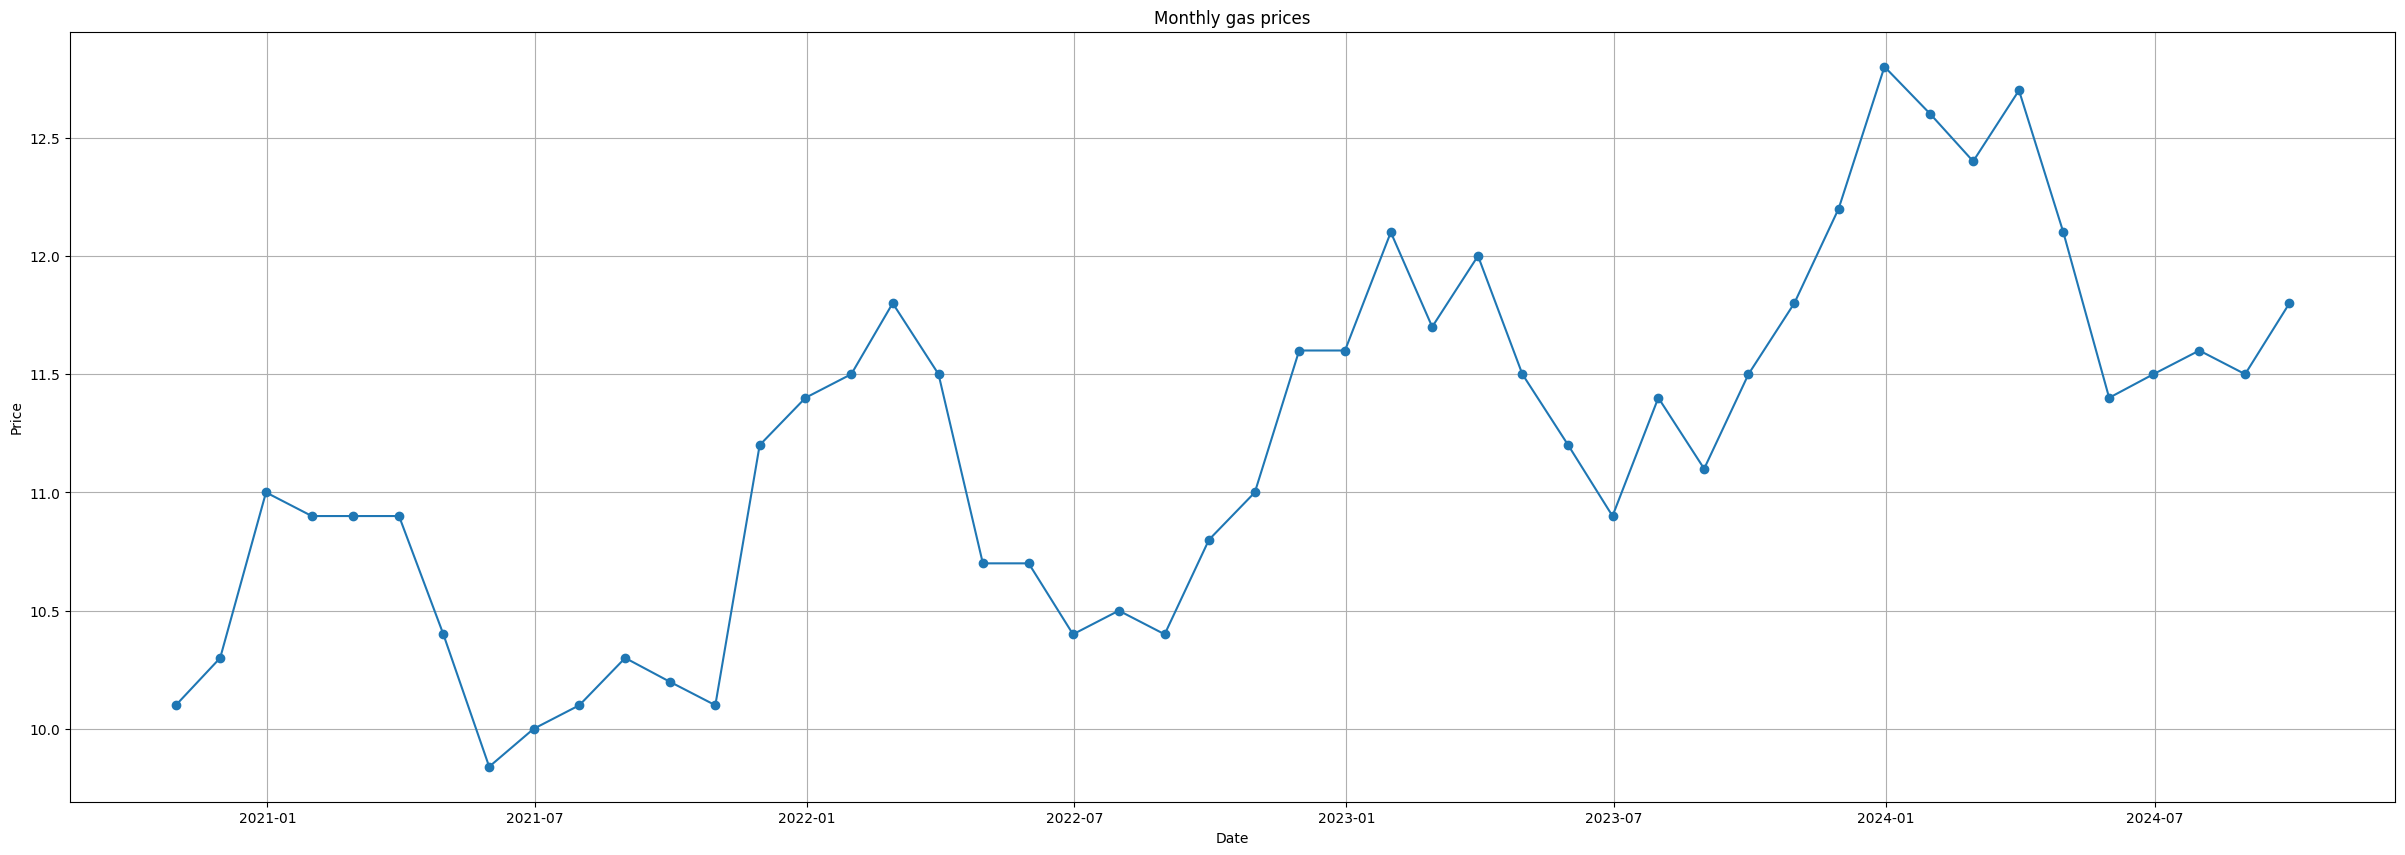

In [145]:
#plotting the data points for visualising

plt.figure(figsize=(30,10))
plt.plot(df.index , df['Prices'], marker='o', linestyle='-')
plt.title("Monthly gas prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [146]:
#Implementing the model SARIMAX with the frequency set to Monthly

df = df.asfreq('M')
train = df.iloc[:-12]   
test = df.iloc[-12:]   


model = SARIMAX(train['Prices'], order =(2,1,2), seasonal_order=(0,1,1,12))
results = model.fit(disp=False)
print(results.summary())

/Users/ashutosh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                               Prices   No. Observations:                   36
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                  -1.455
Date:                              Fri, 19 Sep 2025   AIC                             14.909
Time:                                      21:34:55   BIC                             21.722
Sample:                                  10-31-2020   HQIC                            16.623
                                       - 09-30-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0660     12.922     -0.082      0.934     -26.392      24.260
ar.L2         -0.06

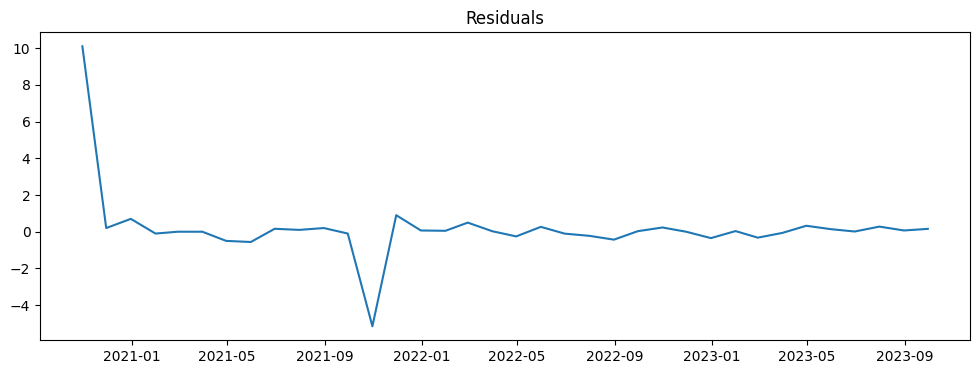

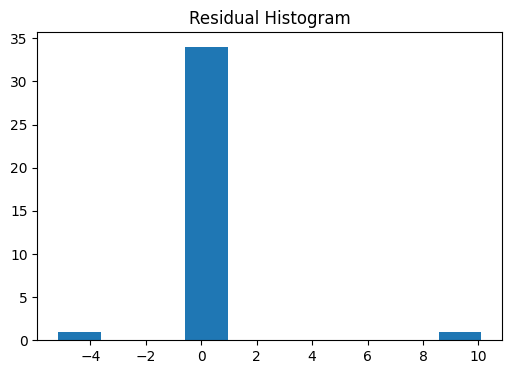

In [147]:
#residual plots from the data . These plots indicate that the value pf actual - predicted values like nearly arounnd the mean, without much scattering.  

residuals = results.resid
plt.figure(figsize=(12,4))
plt.plot(residuals)
plt.title("Residuals")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=10)
plt.title("Residual Histogram")
plt.show()



In [165]:
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)

# Create forecast index starting 1 month after last historical date
forecast_index = pd.date_range(start=train.index[-1] + pd.DateOffset(months=1), 
                               periods=forecast_steps, freq='M')

forecast_df = pd.DataFrame({'Price': forecast.predicted_mean}, index=forecast_index)

print(forecast_df)

                Price
2023-10-31  11.330314
2023-11-30  12.205015
2023-12-31  12.282511
2024-01-31  12.659739
2024-02-29  12.427327
2024-03-31  12.614954
2024-04-30  11.838776
2024-05-31  11.716838
2024-06-30  11.416892
2024-07-31  11.792042
2024-08-31  11.595223
2024-09-30  11.944030


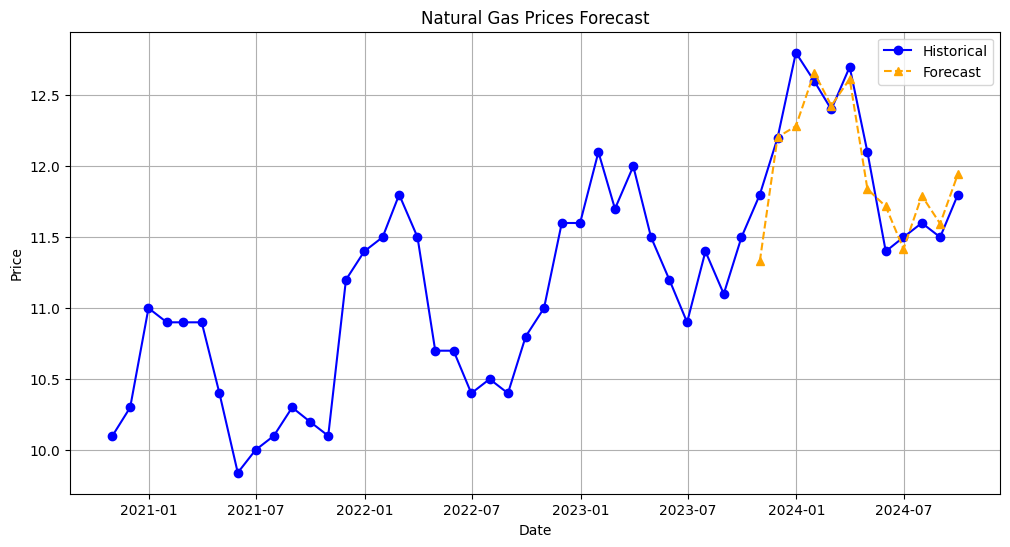

In [166]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Historical prices (solid blue line with circle markers)
plt.plot(df.index, df['Prices'], 
         color='blue', linestyle='-', marker='o', 
         label='Historical')

# Forecasted prices (dashed orange line with triangle markers)
plt.plot(forecast_df.index, forecast_df['Price'], 
         color='orange', linestyle='--', marker='^', 
         label='Forecast')

# Labels and title
plt.title("Natural Gas Prices Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)

# Legend
plt.legend()

plt.show()




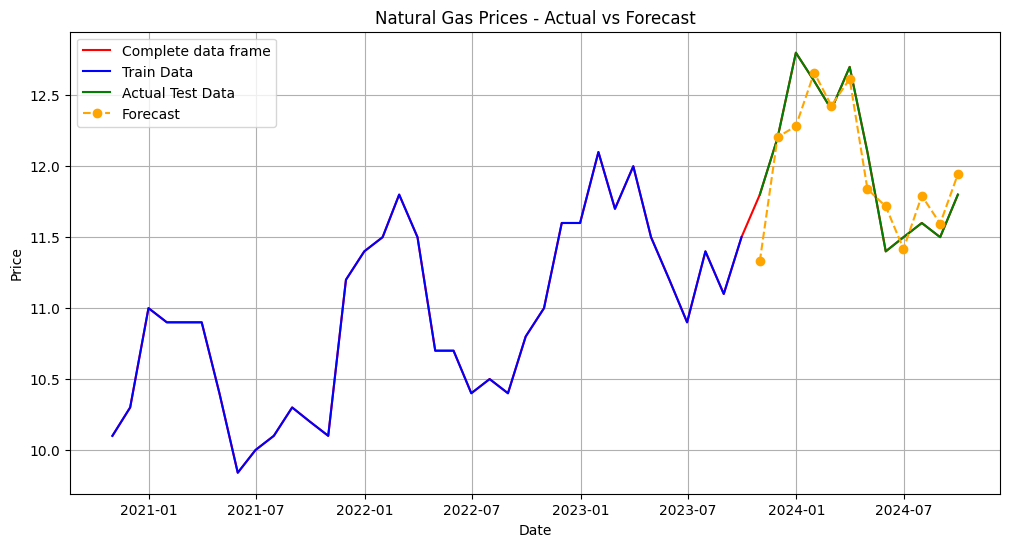

In [170]:
plt.figure(figsize=(12,6))

plt.plot(df.index, df['Prices'], label='Complete data frame', color='red')

# Historical
plt.plot(train.index, train['Prices'], label='Train Data', color='blue')

# Actual test data
plt.plot(test.index, test['Prices'], label='Actual Test Data', color='green')

# Predicted values
plt.plot(test.index, forecast_df, label='Forecast', color='orange', linestyle='--', marker='o')

plt.title("Natural Gas Prices - Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [168]:

#r2 score is calculated to be approximately 0.7337

from sklearn.metrics import r2_score
r2 = r2_score(test['Prices'], forecast_df)
print(r2)

0.7336616055917626


In [172]:
#prints the forecasted values 
print(forecast_df)


                Price
2023-10-31  11.330314
2023-11-30  12.205015
2023-12-31  12.282511
2024-01-31  12.659739
2024-02-29  12.427327
2024-03-31  12.614954
2024-04-30  11.838776
2024-05-31  11.716838
2024-06-30  11.416892
2024-07-31  11.792042
2024-08-31  11.595223
2024-09-30  11.944030


In [177]:

def estimate_price_at_any_point(input_date): 
    date = pd.to_datetime(input_date)

    first_date = df.index.min()
    last_date = df.index.max()

    if date < first_date :
         return f"Date {date.date()} is before available data."

    elif date<= last_date: 
         return np.interp(date.toordinal(), 
                         df.index.map(pd.Timestamp.toordinal), 
                         df['Prices'])


    else:
        months_ahead = (date.year - last_date.year) * 12 + (date.month - last_date.month)
        forecast = results.get_forecast(steps=months_ahead)
        return forecast.predicted_mean.iloc[-1]    
        

In [181]:
print(estimate_price_at_any_point("2022-05-15"))  # Past, within historical
print(estimate_price_at_any_point("2025-03-09"))  # Future, extrapolated
print(estimate_price_at_any_point("2020-01-31"))  # Before dataset


10.7
12.614953858279971
Date 2020-01-31 is before available data.
